<a href="https://colab.research.google.com/github/AlyW8/Data-Science/blob/main/Unit7ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fitting Curves: Concepts

What you'll do:

- Answer questions about what a GP is, and its relationship to GLMs and splines.
- Practice applying each of: polynomial modeling, b splines, and GPs
- You'll get a chance to read about and try to comprehend a more standard implementation of a GP.

Have fun!

**Task1**:

Why would you ever want to include a polynomial element in a model you built? What's the benefit of using polynomials to model?

- Including a polynomial element in a model allows it to model curves in the data set more effectively. It can easily lead to overfitting though.

**Task2**:

Why would you ever NOT want to include a polynomial element in a model you built?

- If the data can be effectively modeled with a linear or other function and doesn't have curves that necessitate a polynomial element, then avoiding the polynomial would be best, as it can overfit the data.

**Task3**:

What's the point of using b splines?

- b splines splits the data into various sections stitches together various functions that fit those portions of the data, like a piecewise function. It can also assign weights to the functions it stitches together when creating an overall line. Knots are the nodes that divide the data into pieces for the b spline.

**Task4**:

Describe what a Gaussian Process is, in your own words. *Don't worry about being correct, just try to explain it to yourself*. I will not grade this question for accuracy.

- A Gaussian Process is a model that treats each individual data point as its own function, and focuses on finding its relationship to the surrouding data points to find an overall pattern to the data.

In [28]:
!pip install preliz
!pip install bambi

In [29]:
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt
import preliz as pz
import pymc as pm
import bambi as bmb

**Task5**:

Fit three models to the howell data (from Unit5ExercisesSF): polynomial, b splines, and Gaussian Process.

Plot the posterior predictive check on a scatter plot, as is standard/required.

Hint: Distributional models (variable variance) work better on the howell data.


In [30]:
howell = pd.read_csv('https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/main/Data/howell.csv')
howell

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0
...,...,...,...,...
539,145.415,31.127751,17.0,1
540,162.560,52.163080,31.0,1
541,156.210,54.062497,21.0,0
542,71.120,8.051258,0.0,1


<Axes: xlabel='height', ylabel='weight'>

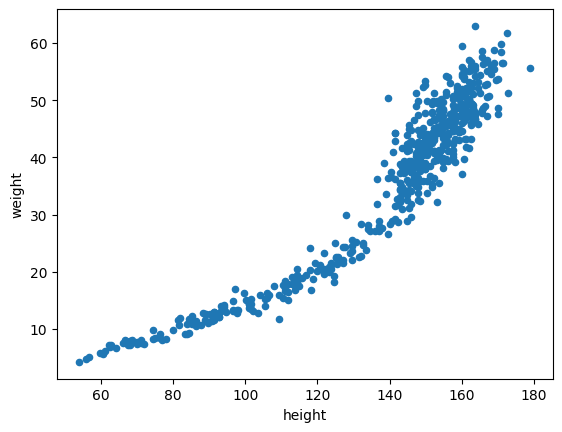

In [31]:
howell.plot.scatter('height','weight')

In [32]:
#polynomial
howell_poly = bmb.Model('weight ~ poly(height, degree=4)', data=howell)
idata_poly = howell_poly.fit()


Output()

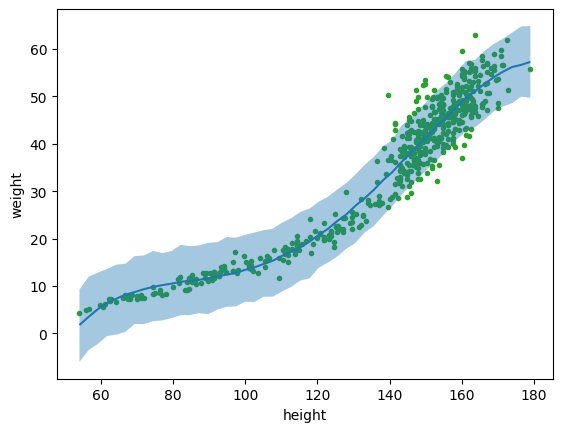

In [33]:
bmb.interpret.plot_predictions(howell_poly, idata_poly, "height", pps=True)
plt.plot(howell.height, howell.weight, "C2.", zorder=-3)

In [34]:
formula_howell = bmb.Formula(
    "weight ~ poly(height, degree=2)",
    "sigma ~ height")
howell_poly_2 = bmb.Model(formula_howell, howell)
idata_poly_2 = howell_poly_2.fit()

Output()

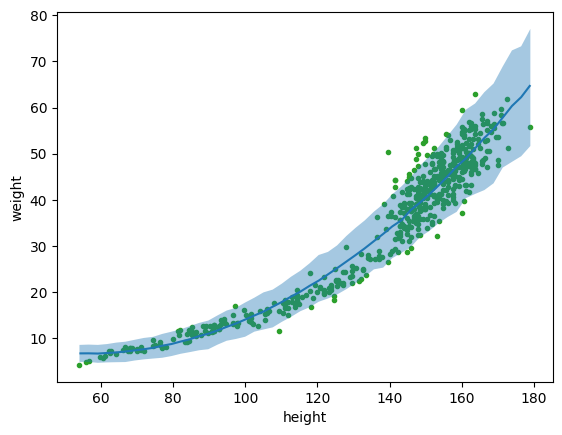

In [35]:
bmb.interpret.plot_predictions(howell_poly_2, idata_poly_2, "height", pps=True)
plt.plot(howell.height, howell.weight, "C2.", zorder=-3)

In [36]:
formula_howell_3 = bmb.Formula(
    "weight ~ poly(height, degree=3)",
    "sigma ~ height")
howell_poly_3 = bmb.Model(formula_howell_3, howell)
idata_poly_3 = howell_poly_3.fit()

Output()

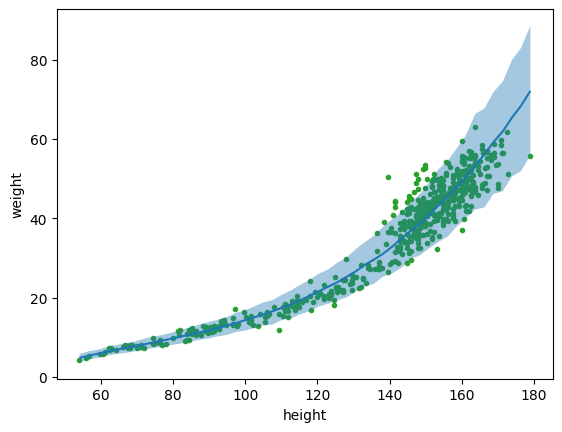

In [37]:
bmb.interpret.plot_predictions(howell_poly_3, idata_poly_3, "height", pps=True)
plt.plot(howell.height, howell.weight, "C2.", zorder=-3)

**Task6**:

Read the article on the pymc website about GP implementation on the Mauna Loa CO$_{2}$ data combined with CO$_{2}$ ice core data from the south pole.
[Link here.](https://www.pymc.io/projects/examples/en/latest/gaussian_processes/GP-MaunaLoa2.html)

Write down one thing you learned about GPs from reading the article.

Note: You probably won't understand much in this article--I had to read it about five times before I figured out what was going on. The points of this task are to: hammer home that good GP implementations are extremely technical, and increasure your exposure to the kinds of problems traditional GPs are good at solving.


- Use a prior with a restricted order to force the data points in chronological order
-

**Task7**:

Describe your favorite graph from the article in the previous task with as much technical detail as you can muster.

Explain why its your favorite.